# 6.4 Supervised Machine Learning: Regression

## Contents

### 01. Importing Libraries

### 02. Cleaning Data 

### 03. Exploring the Data Set

### 04. Hypothesis

### 05. Data Preparation for Regression Analysis

### 06. Regression Analysis

#### 01. Imporitng Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Create path
path = "/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6"

In [4]:
# Import cleaned bike data
df = pd.read_csv(os.path.join(path, '6.1', 'Open_Source_Data', 'cleaned_bike_data.csv'))

#### 02. Cleaning Data

In [5]:
# Check column names
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'birth_year_missing'],
      dtype='object')

In [6]:
# Check data 
df.head(20)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False
4,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,1986.0,female,False
5,aOKk3s,15022.0,Sun,13.0,29/09/2013 13:13,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,29/09/2013 13:23,317.0,E 6 St & Avenue B,40.724537,-73.981854,639.0,Subscriber,1994.0,male,False
6,kpcluW,16253.0,Sat,10.0,21/09/2013 10:48,346.0,Bank St & Hudson St,40.736529,-74.006180,21/09/2013 10:52,212.0,W 16 St & The High Line,40.743349,-74.006817,263.0,Subscriber,1969.0,male,False
7,GC8mJC,16745.0,Fri,12.0,20/09/2013 12:29,510.0,W 51 St & 6 Ave,40.760660,-73.980420,20/09/2013 12:40,422.0,W 59 St & 10 Ave,40.770513,-73.988038,666.0,Subscriber,1993.0,male,False
8,qyXq7X,19556.0,Tue,16.0,03/09/2013 16:56,446.0,W 24 St & 7 Ave,40.744876,-73.995299,03/09/2013 17:05,342.0,Columbia St & Rivington St,40.717400,-73.980166,582.0,Subscriber,1983.0,male,False
9,aZsCdK,15732.0,Sat,20.0,07/09/2013 20:01,457.0,Broadway & W 58 St,40.766953,-73.981693,07/09/2013 20:23,512.0,W 29 St & 9 Ave,40.750073,-73.998393,1313.0,Non-Subscriber,1978.0,NaN,True


In [7]:
# Check shape
df.shape

(47063, 19)

In [8]:
# Check for missing values 
df.isnull().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                    0
gender                     6116
birth_year_missing            0
dtype: int64

##### For now, I will keep the NaNs, I will not drop or impute. I may require gender-related analysis later. If I drop the rows, I will lose a significant portion of my data (14%), and those trips might still be useful for non-gender-based insights. If I impute gender, I will introduce bias and possibly distort gender distribution. Gender is categorical, so median/mode imputation isn't reliable here. Instead, I will filter when needed, e.g. I will exclude the NaN entries in my queries or visualizations.

In [9]:
# Check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(47063,)

##### No duplicates.

In [11]:
# Create 'age' from 'birth_year'
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['birth_year']

# Drop birth_year & use 'age' instead
df = df.drop(columns=['birth_year'])

# Preview cleaned dataset
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,gender,birth_year_missing,age
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,female,False,57.0
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,male,False,42.0
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,male,False,36.0
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,female,False,37.0
4,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,female,False,39.0


In [12]:
# Check shape
df.shape

(47063, 19)

#### 03. Exploring the Data Set 

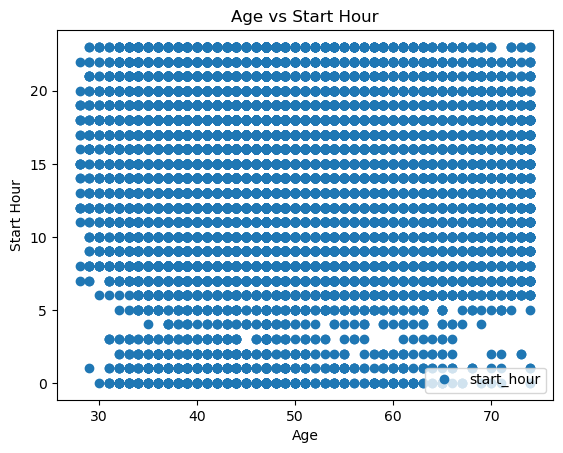

In [13]:
# Create a scatterplot using matplotlib for Age vs. Start Hour
df.plot(x = 'age', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines
plt.title('Age vs Start Hour')  
plt.xlabel('Age')  
plt.ylabel('Start Hour')  
plt.show()

In [14]:
# Create a new DataFrame with just the two columns
age_start_df = df[['age', 'start_hour']]

# Export to CSV for Tableau
age_start_df.to_csv('age_vs_start_hour.csv', index=False)

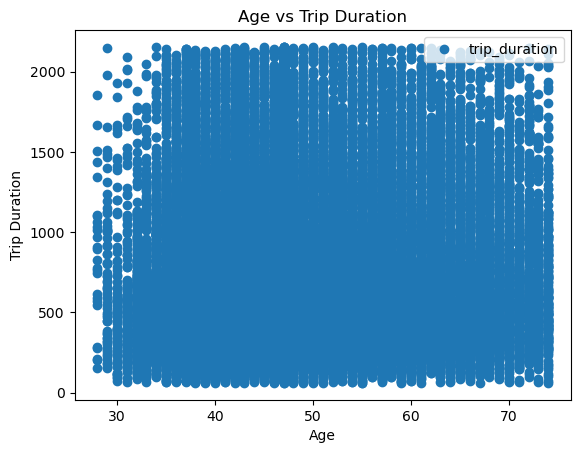

In [15]:
# Create a scatterplot using matplotlib for Age vs. Trip Duration
df.plot(x = 'age', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines
plt.title('Age vs Trip Duration')  
plt.xlabel('Age')  
plt.ylabel('Trip Duration')  
plt.show()

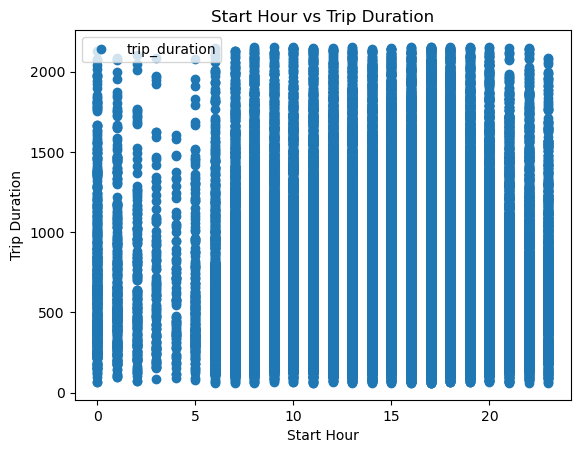

In [16]:
# Create a scatterplot using matplotlib for Start Hour vs. Trip Duration
df.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines
plt.title('Start Hour vs Trip Duration')  
plt.xlabel('Start Hour')  
plt.ylabel('Trip Duration')  
plt.show()

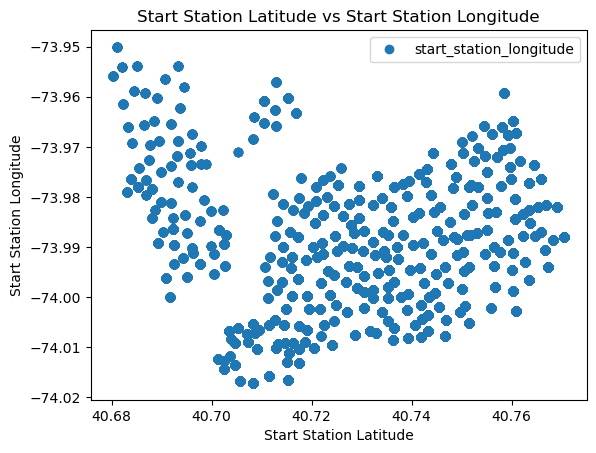

In [17]:
# Create a scatterplot using matplotlib for Start Station Latitude vs. Start Station Longitude
df.plot(x = 'start_station_latitude', y='start_station_longitude',style='o') # The style option creates a scatterplot; without it, we only have lines
plt.title('Start Station Latitude vs Start Station Longitude')  
plt.xlabel('Start Station Latitude')  
plt.ylabel('Start Station Longitude')  
plt.show()

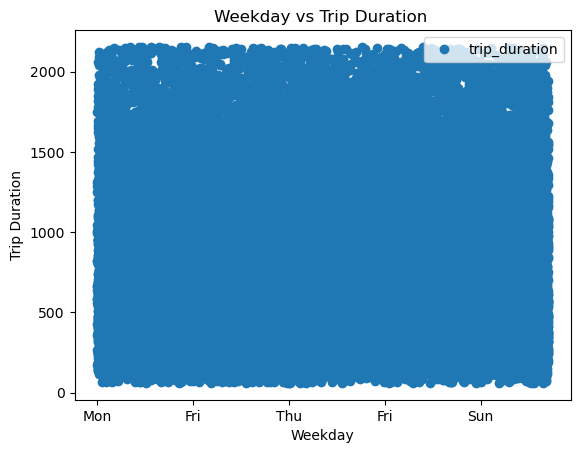

In [18]:
# Create a scatterplot using matplotlib for Weekday vs. Trip Duration 
df.plot(x = 'weekday', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines
plt.title('Weekday vs Trip Duration ')  
plt.xlabel('Weekday')  
plt.ylabel('Trip Duration')  
plt.show()

In [19]:
# Only include numerical columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlations with trip_duration
correlations = numeric_cols.corr()['trip_duration'].sort_values(ascending=False)
print(correlations)

trip_duration              1.000000
start_hour                 0.049034
end_station_id             0.048377
start_station_id           0.044290
age                        0.012135
bike_id                    0.001805
start_station_longitude   -0.019419
end_station_longitude     -0.024046
start_station_latitude    -0.027748
end_station_latitude      -0.048463
Name: trip_duration, dtype: float64


In [20]:
# Only include numerical columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlations with age
correlations = numeric_cols.corr()['age'].sort_values(ascending=False)
print(correlations)

age                        1.000000
start_station_latitude     0.051065
end_station_latitude       0.047558
trip_duration              0.012135
start_station_id           0.004164
end_station_id             0.003142
bike_id                   -0.007480
start_station_longitude   -0.021154
end_station_longitude     -0.032219
start_hour                -0.062897
Name: age, dtype: float64


In [21]:
# Only include numerical columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlations with start_hour
correlations = numeric_cols.corr()['start_hour'].sort_values(ascending=False)
print(correlations)

start_hour                 1.000000
trip_duration              0.049034
end_station_id             0.007991
end_station_longitude      0.005775
start_station_id          -0.001544
bike_id                   -0.001675
start_station_latitude    -0.010216
end_station_latitude      -0.035669
start_station_longitude   -0.045665
age                       -0.062897
Name: start_hour, dtype: float64


##### Looking at the scatterplots, it is not possible to identify any patterns or relationships. Therefore, I have computed the correlations of specific variables to determine the strongest correlations. A correlation of -0.062897, suggestive of a weak negative correlation has been identified as the strongest correlation between all variables. These variables equate to age and start_hour.

#### 04. Hypothesis

##### **If a bike user is older, then they are more likely to start their bike trip later in the day.**

#### 05. Data Preparation for Regression Analysis

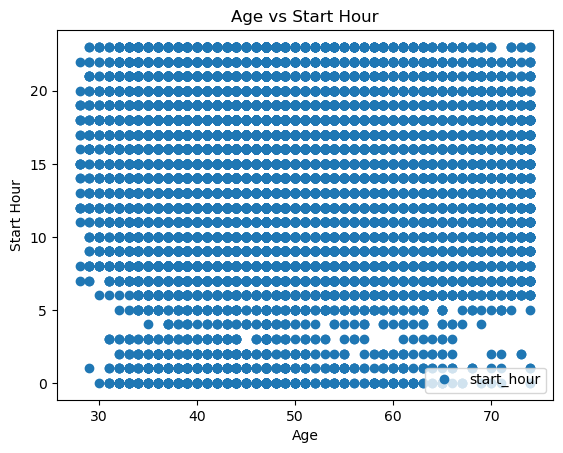

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'age', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines
plt.title('Age vs Start Hour')  
plt.xlabel('Age')  
plt.ylabel('Start Hour')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['age'].values.reshape(-1,1) # X is standard notation for independent variable
y = df['start_hour'].values.reshape(-1,1)

In [24]:
# Check X
X

array([[57.],
       [42.],
       [36.],
       ...,
       [55.],
       [64.],
       [45.]])

In [25]:
# Check y
y

array([[18.],
       [18.],
       [19.],
       ...,
       [17.],
       [18.],
       [21.]])

In [26]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 06. Regression Analysis

In [27]:
# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [28]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

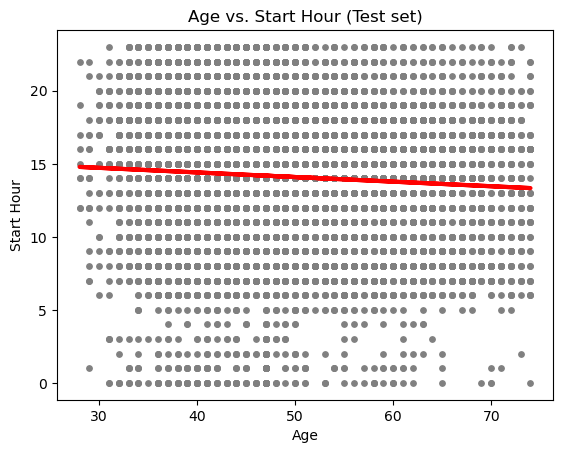

In [30]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs. Start Hour (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Start Hour')
plot_test.show()

##### **The regression line does not appear to fit the data particularly well. The data points are widely scattered across the plot, with many lying far from the regression line. While the line does pass through a few data points, the overall spread of the data suggests a weak linear relationship. This visual pattern aligns with the low correlation previously observed, indicating that the model likely struggles to accurately capture the relationship between the variables. Therefore, the regression line may not be a reliable predictor in this case.**

In [31]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [32]:
# Print the model summary statistics
# Evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03151607]]
Mean squared error:  23.66394771016112
R2 score:  0.004501487648480573


In [33]:
# Predict the values of y
y_predicted

array([[13.99837471],
       [14.1874711 ],
       [14.47111569],
       ...,
       [14.3765675 ],
       [13.4626016 ],
       [14.21898717]])

In [34]:
# Create a DataFrame comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,17.0,13.998375
1,10.0,14.187471
2,20.0,14.471116
3,15.0,14.187471
4,8.0,14.187471
5,16.0,14.187471
6,18.0,14.439600
7,15.0,13.714730
8,7.0,14.408084
9,10.0,14.218987


##### **Upon reviewing the predicted values compared to the actual values in the test set, it is clear that the model's performance is weak. The predicted y-values are tightly clustered around a narrow range (roughly 13.6 to 14.5), while the actual y-values vary more widely (from 7.0 to 21.0). This indicates that the model is failing to capture the full spread or variability of the data.The lack of prediction range suggests the model may be underfitting — it's too simplistic to detect any meaningful patterns in the data. This aligns with earlier observations from the scatterplot and correlation analysis, where no strong linear trend was apparent.**
##### **Imputing missing birth years with the median likely introduced bias into the analysis by distorting the natural distribution of ages. This approach causes an artificial concentration of users around the median age, which can reduce variability and weaken the observed relationship between age and start hour. Additionally, it overlooks any underlying patterns in the missing data, such as specific groups being more likely to omit their birth year. As a result, the regression model may not accurately reflect real-world behaviour, and its findings should be interpreted with caution.**

In [35]:
# Compare how the regression fits the training set
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03151607]]
Mean squared error:  23.88115336675295
R2 score:  0.003706294791157805


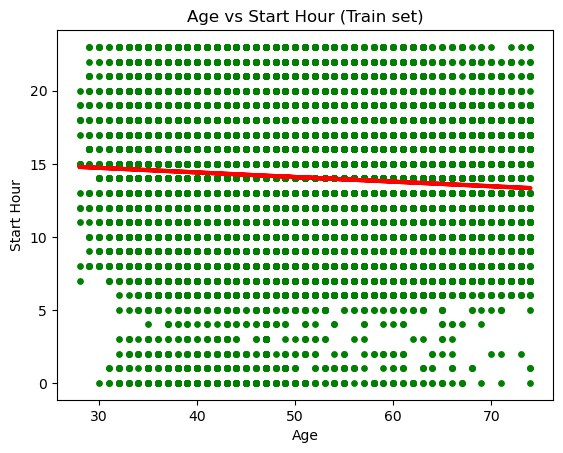

In [38]:
# Visualising the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Start Hour (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Start Hour')
plot_test.show()

##### **My model fits the training set slightly worse than the test set (confirmed by an R² score of 0.0037). This suggests that my model has not overfit the training data. However, the very low R² score on both sets confirms that the relationship I'm exploring isn’t strongly linear, and the model does a poor job at explaining the variance in the data.**